In [35]:
from ecell4 import *
import numpy as np
import math
import sys
import os
#%matplotlib inline
rng = core.GSLRandomNumberGenerator()
phio = 0.05#float(sys.argv[1]) 
rm = 0.005
Do = 0
Dt = 1
Nt = 1
dtfactor = 1e-3
tmol = (2*rm)**2 / (2*Dt)
L = 15*rm*2
At = L*L
Ap = math.pi*rm*rm
No = int(phio*At/Ap)
mat = Integer3(1,1,1)*int(L/2/rm)#max(3,int((Nall)**(1./2)))
#print 'matrix size',tuple(mat)
#print 'phio',No*Ap/At,'Nt',Nt,'No',No
tt = np.logspace(-8,1,70)
tt = np.insert(tt,0,0.)
dur = tt[-1]#tmol*10**5

def singlerun(run):
    #run = 0#int(sys.argv[2]) 
    #print 'run',run
    rng.seed(run)

    w = egfrd.EGFRDWorld(Real3(L,L,L),matrix_sizes=mat,rng=rng)
    x,y,z = w.actual_lengths()

    with species_attributes():
         T | {'D':str(Dt),'radius':str(rm)}
         O | {'D':str(Do),'radius':str(rm)}
    m=get_model()
    w.bind_to(m)
    (PID,p),suc = w.new_particle(Species("T"),Real3(0,L*0.5,L*0.5))

    for i in range(No):
         while(True):
              (pid1,p1),suc = w.new_particle(Species("O"),Real3(0,rng.uniform(0.0,L),rng.uniform(0.0,L)))
              if (suc): break

    sim = egfrd.BDSimulator(w)
    sim.set_dt(tmol*dtfactor)
    sim.initialize()
    if (run==0):
        print 'L={},rm={},Do={},Dt={},tmol={:.2E},duration={},simdt={}'.format(L,rm,Do,Dt,tmol,dur,sim.dt())
    pid,p = w.get_particle(PID)    
    simdt = sim.dt()
    obs = TimingTrajectoryObserver(tt,[pid],True,tmol)
    sim.run(dur,obs)
    data=obs.data()[0]
    msd = np.array([np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[0]))) ** 2 for pos in data]) 
    return msd
'''
dirname = 'data/BDphi'+str(phio)
if not os.path.exists(dirname):
    os.makedirs(dirname)
name = dirname + '/phi'+str(phio)+'run'+str(run)+'.csv'
filename = open(name,'w')
np.savetxt(filename,np.column_stack((tt,msd)),delimiter=',',fmt='%s')
filename.close()
print 'saving to ',name
'''

"\ndirname = 'data/BDphi'+str(phio)\nif not os.path.exists(dirname):\n    os.makedirs(dirname)\nname = dirname + '/phi'+str(phio)+'run'+str(run)+'.csv'\nfilename = open(name,'w')\nnp.savetxt(filename,np.column_stack((tt,msd)),delimiter=',',fmt='%s')\nfilename.close()\nprint 'saving to ',name\n"

In [36]:
norun = 1
for run in range(norun):
    msd = singlerun(run)
    if (run==0):
        MSD = msd
    else: 
        MSD+=msd
MSD /= norun

L=0.15,rm=0.005,Do=0,Dt=1,tmol=5.00E-05,duration=10.0,simdt=5e-08


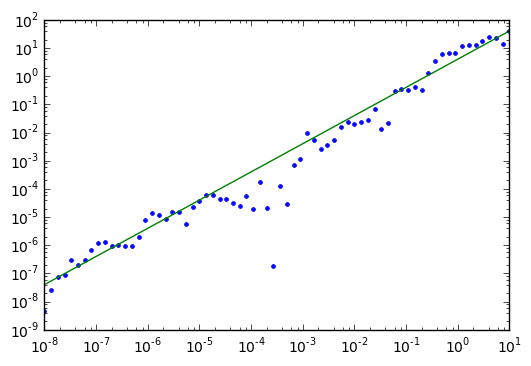

In [37]:
dct = MSD[1:]/tt[1:]/4./Dt
%matplotlib inline
import matplotlib.pyplot as plt
plt.loglog(tt,MSD,'.')
plt.plot(tt,4.*Dt*np.array(tt))

(0.2, 1.1)

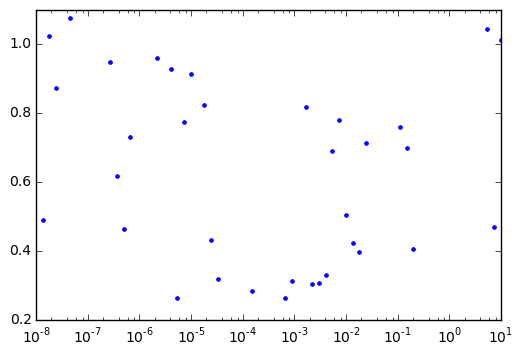

In [38]:
plt.semilogx(tt[1:],dct,'.')
plt.ylim(0.2,1.1)

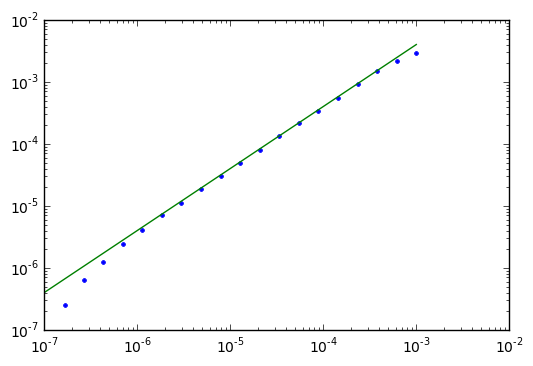

In [6]:
msd = MSD/norun
dct = msd[1:]/tt[1:]/4./Dt
import matplotlib.pyplot as plt
plt.loglog(tt,msd,'.')
#plt.semilogx(tt[1:],dct,'.')
plt.plot(tt,4.*Dt*np.array(tt))


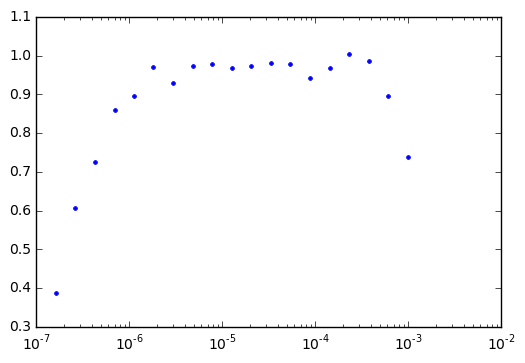

In [7]:
msd = MSD/norun
dct = msd[1:]/tt[1:]/4./Dt
import matplotlib.pyplot as plt
#plt.loglog(tt,msd,'.')
plt.semilogx(tt[1:],dct,'.')
#plt.plot(tt,4.*Dt*np.array(tt))

In [ ]:
data=obs.data()
leng = np.array(data).shape[1]
msd=np.zeros(leng,float) #zeros array for initiation of sum of squared displacement
for i in range(Nt):
     msd += np.array(
     [np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[i][0]))) ** 2
          for pos in data[i]]) 

msd = msd/Nt
t=np.arange(0,dur,simdt)
name = 'data/BDphi'+str(phio)+'/phi'+str(phio)+'run'+str(run)+'.csv'
filename = open(name,'w')
np.savetxt(filename,np.column_stack((t,msd)),delimiter=',',fmt='%s')
filename.close()
print 'saving to ',name

In [13]:
#M = max(3, int(min(cbrt(N), L / max(diameter))))
print Nall
print int((Nall)**(1./2))
print int(L/rm)

2303
47
200


In [15]:

Deff = msd[1:]/t[1:]/4/Dt
plt.plot(t,msd)
plt.plot(t,4*Dt*t,'g-')  #theoretical line
plt.xlabel("time")
plt.ylabel("msd")
plt.show()

In [3]:
plt.loglog(t[1:],Deff)
plt.xlabel("time")
plt.ylabel("D/Do")
print np.mean(Deff[-10:])
plt.show()

0.748632071987


In [9]:
#viz.plot_world(w)

In [7]:
print Deff[-10:]

[ 0.31446205  0.31451613  0.3146622   0.3142563   0.31506291  0.31394816
  0.31434592  0.31380255  0.31425508  0.31323333]


In [11]:
p = w.list_particles(Species("M"))

In [13]:
print len(p)+186+74611

186528


In [6]:
print tuple(Integer3(1,1,1)*3)

(3, 3, 3)


In [ ]:
from ecell4 import *
import numpy as np
import math
import sys
import os
#%matplotlib inline
rng = core.GSLRandomNumberGenerator()
phio = float(sys.argv[1]) 
run = int(sys.argv[2]) 
rm = 0.005
Do = 0
Dt = 1
Nt = 1
dtfactor = 1e-3
tt = np.logspace(-8,1,70)
tt = np.insert(tt,0,0.)
tmol = (2*rm)**2 / (2*Dt)
L = 15*rm*2
At = L*L
Ap = math.pi*rm*rm
No = int(phio*At/Ap)
mat = Integer3(1,1,1)*int(L/2/rm)#max(3,int((Nall)**(1./2)))
print 'matrix size',tuple(mat)
print 'phio',No*Ap/At,'Nt',Nt,'No',No
dur = tt[-1]#tmol*10**5
print 'run',run
rng.seed(run)
w = egfrd.EGFRDWorld(Real3(L,L,L),matrix_sizes=mat,rng=rng)
x,y,z = w.actual_lengths()

with species_attributes():
     T | {'D':str(Dt),'radius':str(rm)}
     O | {'D':str(Do),'radius':str(rm)}
m=get_model()
w.bind_to(m)
(PID,p),suc = w.new_particle(Species("T"),Real3(0,L*0.5,L*0.5))

for i in range(No):
     while(True):
          (pid1,p1),suc = w.new_particle(Species("O"),Real3(0,rng.uniform(0.0,L),rng.uniform(0.0,L)))
          if (suc): break

sim = egfrd.BDSimulator(w)
sim.set_dt(tmol*dtfactor)
sim.initialize()
print 'L={},rm={},Do={},Dt={},tmol={:.2E},duration={},simdt={}'.format(L,rm,Do,Dt,tmol,dur,sim.dt())
pid,p = w.get_particle(PID)    
simdt = sim.dt()
obs = TimingTrajectoryObserver(tt,[pid],True,tmol)
sim.run(dur,obs)
data=obs.data()[0]
msd = np.array([np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[0]))) ** 2 for pos in data]) 
dirname = 'data/BDphi'+str(phio)
if not os.path.exists(dirname):
    os.makedirs(dirname)
name = dirname + '/phi'+str(phio)+'run'+str(run)+'.csv'
filename = open(name,'w')
np.savetxt(filename,np.column_stack((tt,msd)),delimiter=',',fmt='%s')
filename.close()
print 'saving to ',name